# Types of Clustering

* Hierarchical clustering creates a tree of clusters. Hierarchical clustering, not surprisingly, is well suited to hierarchical data, such as taxonomies. In addition, another advantage is that any number of clusters can be chosen by cutting the tree at the right level.


* Centroid-based clustering organizes the data into non-hierarchical clusters, in contrast to hierarchical clustering defined below. k-means is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers. 


* Density-based clustering connects areas of high example density into clusters. This allows for arbitrary-shaped distributions as long as dense areas can be connected. These algorithms have difficulty with data of varying densities and high dimensions. Further, by design, these algorithms do not assign outliers to clusters.

* Distribution-based Clustering
    This clustering approach assumes data is composed of distributions, such as Gaussian distributions. 

    eg.the distribution-based algorithm clusters data into three Gaussian distributions. As distance from the distribution's center increases, the probability that a point belongs to the distribution decreases. The bands show that decrease in probability. When you do not know the type of distribution in your data, you should use a different algorith

### why algo not work in productions

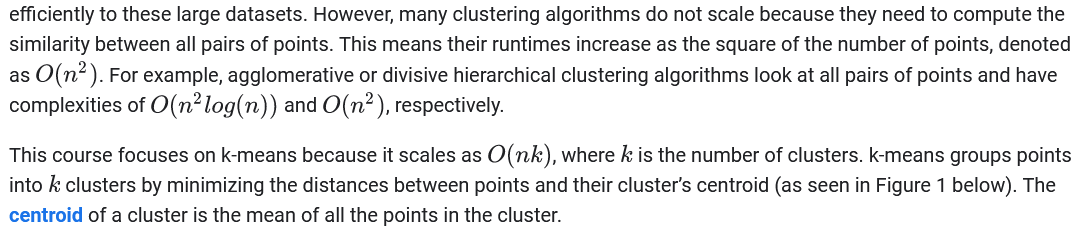

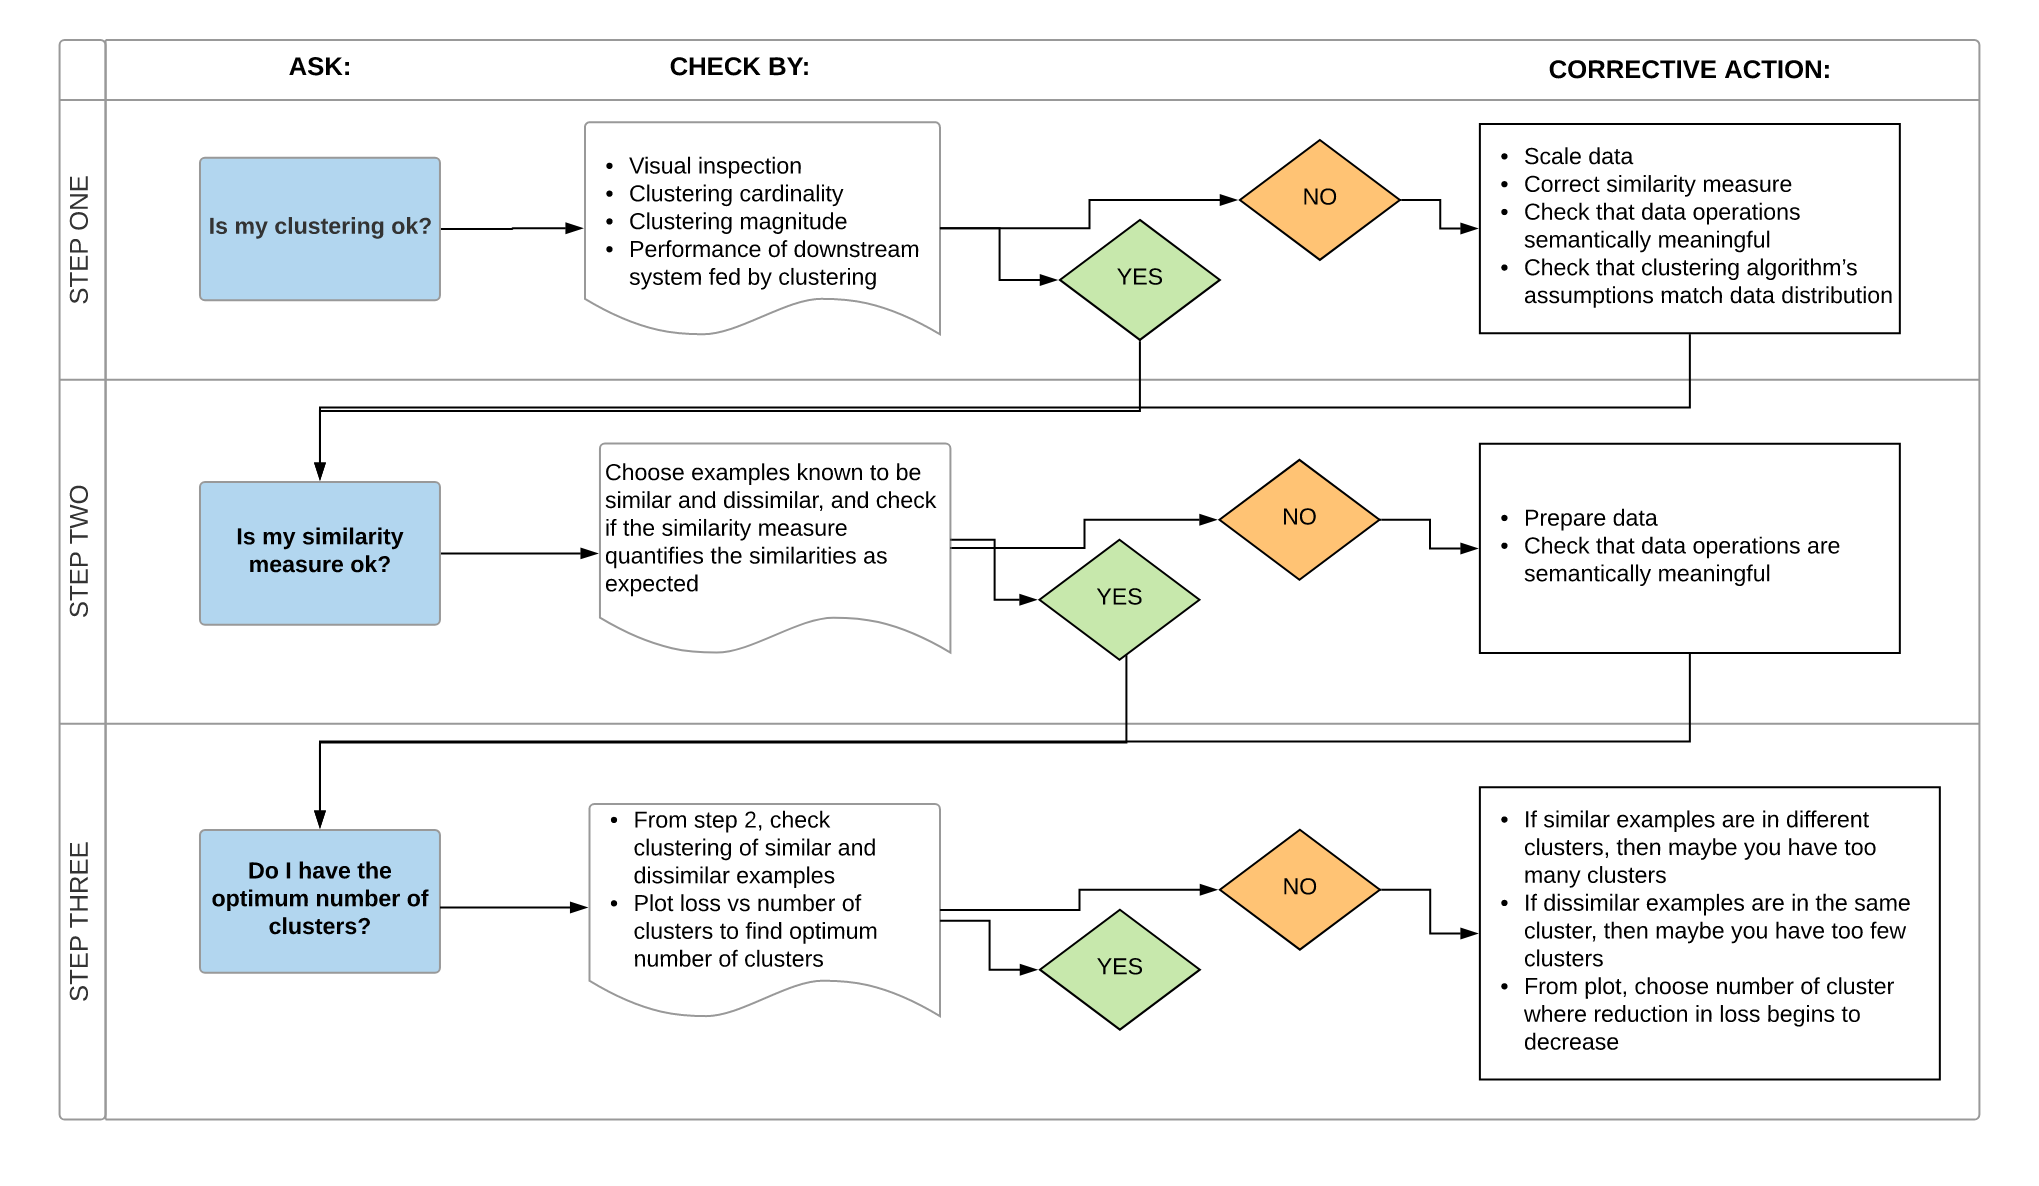

# similarity measure

Your clustering algorithm is only as good as your similarity measure. Make sure your similarity measure returns sensible results. The simplest check is to identify pairs of examples that are known to be more or less similar than other pairs. Then, calculate the similarity measure for each pair of examples. Ensure that the similarity measure for more similar examples is higher than the similarity measure for less similar examples.

If you find examples with inaccurate similarities, then your similarity measure probably does not capture the feature data that distinguishes those examples

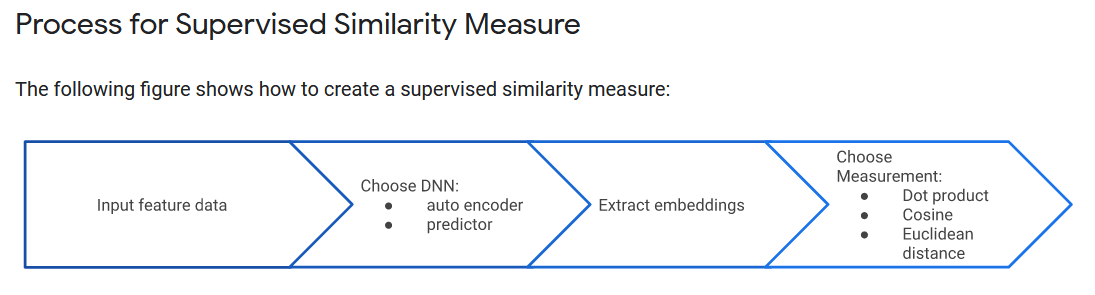

# Questions to Investigate If Problems are Found

If you find problems, then check your data preparation and similarity measure, asking yourself the following questions:

    Is your data scaled?
    Is your similarity measure correct?
    Is your algorithm performing semantically meaningful operations on the data?
    Do your algorithm’s assumptions match the data?


# Kmeans

. As K increases, clusters become smaller, and the total distance decreases. Plot this distance against the number of clusters.

Important Concepts : https://www.edupristine.com/blog/k-means-algorithm

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv("Data/driver-data.csv", index_col="id")
data.head()


,mean_dist_day,mean_over_speed_perc
id,,
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25


# normailsation

You can transform data for multiple features to the same scale by normalizing the data. In particular, normalization is well-suited to processing the most common data distribution, the Gaussian distribution. Compared to quantiles, normalization requires significantly less data to calculate. Normalize data by calculating its z-score 


apply normalization when either of the following are true:

    Your data has a Gaussian distribution.
    Your data set lacks enough data to create quantiles.


## Using the Log Transform
Sometimes, a data set conforms to a power law distribution that clumps data at the low end.

# Missing Data
If your dataset has examples with missing values for a certain feature but such examples occur rarely, then you can remove these examples. If such examples occur frequently, we have the option to either remove this feature altogether, or to predict the missing values from other examples by using a machine learning model. For example, you can infer missing numerical data by using a regression model trained on existing feature data.

## finding the k 
Elbow method
sum of squares error (inertia) vs K is elbow-shaped
 It involves running the algorithm multiple times over a loop, with an increasing number of cluster choice and then plotting a clustering score as a function of the number of clusters.

Silhouette coefficient
The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). 

Silhouette coefficient exhibits a peak characteristic as compared to the gentle bend in the elbow method. This is easier to visualize and reason with.

BIC score with a Gaussian Mixture Model
 for determining the true count of the clusters such as Bayesian Information Criterion (BIC) but they can be applied only if we are willing to extend the clustering algorithm beyond k-means to the more generalized version — Gaussian Mixture Model (GMM).
 
 The BIC method penalizes a large number of Gaussians i.e. an overly complex model.

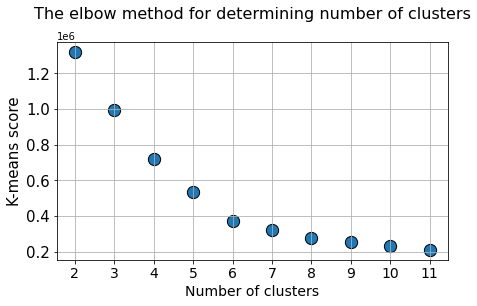

In [26]:
#Loss vs. number of clusters 
##sum of squares error (inertia) vs K in K means clustering algorithm elbow-shaped
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [18]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

km_scores= []
km_silhouette = []
db_score = []
X_scaled=data
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    #print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    #print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    #print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))

print(km_scores)
print(km_silhouette)
print(db_score)

[1318251.109697719, 994102.3994202486, 719606.7515520956, 534718.5033126007, 372968.0087995013, 319890.98862616625, 277163.84217476257, 252944.06696065946, 230011.1271351693, 209418.11310791314]
[0.8489163981913593, 0.8230836984990354, 0.5924607224185304, 0.5129445055048768, 0.48576466293893145, 0.4601549774425284, 0.4521152147826192, 0.44364083079487193, 0.4375170060177185, 0.4115271582720419]
[0.27028205438880093, 0.5229428721574828, 0.6988737736221435, 0.6611861539343656, 0.6578299722199735, 0.6510862694276934, 0.6712630620741954, 0.7908160853253086, 0.8859070699988656, 0.8798665116776775]


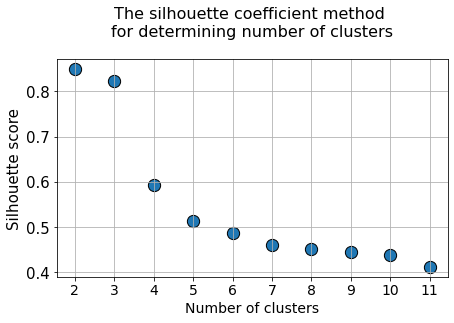

In [27]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

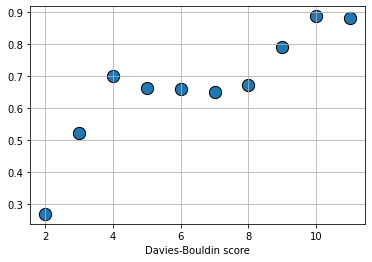

In [28]:


plt.scatter(x=[i for i in range(2,12)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()



In [2]:
X_test=data.tail(6)

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

KMeans(n_clusters=4)

kmeans=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
kmeans.fit(data)

In [4]:
print(kmeans.labels_)
print(kmeans.cluster_centers_)
data["cluster"] = kmeans.labels_
data

[0 0 0 ... 1 1 1]
[[ 50.47819048  32.58809524]
 [180.34984218  10.56384505]
 [ 49.98258633   5.23920863]
 [177.76524272  70.57281553]]


,mean_dist_day,mean_over_speed_perc,cluster
id,,,
3423311935,71.24,28,0
3423313212,52.53,25,0
3423313724,64.54,27,0
3423311373,55.69,22,0
3423310999,54.58,25,0
...,...,...,...
3423310685,160.04,10,1
3423312600,176.17,5,1
3423312921,170.91,12,1


In [5]:
kmeans.inertia_,kmeans.score  #sum of squares error (inertia) 

(719621.6683271449, <bound method KMeans.score of KMeans(n_clusters=4)>)

In [6]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict_data = dict(zip(unique, counts))
dict_data



{0: 423, 1: 696, 2: 2777, 3: 104}

C:\Users\spradhan\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


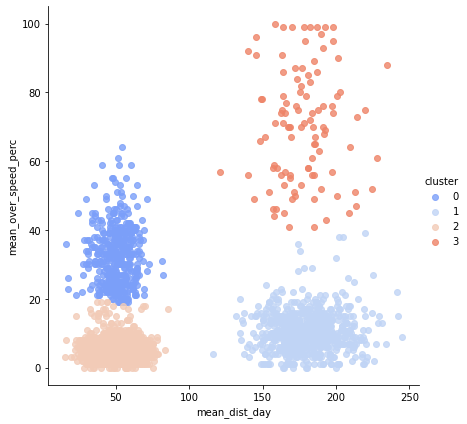

In [7]:
import seaborn as sns
sns.lmplot('mean_dist_day', 'mean_over_speed_perc', data=data,
           hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)



In [8]:
#k_means.predict(X_test) returns labeling, it does not update the internal labels_ field, you should do

print(kmeans.predict(X_test))


[1 1 1 1 1 1]


In [11]:
data.tail(6)

,mean_dist_day,mean_over_speed_perc,cluster
id,,,
3423312567,209.76,18,1
3423310685,160.04,10,1
3423312600,176.17,5,1
3423312921,170.91,12,1
3423313630,176.14,5,1
3423311533,168.03,9,1


sklearn.metrics.homogeneity_score

sklearn.metrics.homogeneity_score(labels_true, labels_pred)[source]

    Homogeneity metric of a cluster labeling given a ground truth.

    A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

    This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

    This metric is not symmetric: switching label_true with label_pred will return the completeness_score which will be different in general.

# Quality of Clustering
Checking the quality of clustering is not a rigorous process because clustering lacks “truth”.

* Cluster cardinality

Cluster cardinality is the number of examples per cluster. Plot the cluster cardinality for all clusters and investigate clusters that are major outliers.

* Cluster magnitude

Cluster magnitude is the sum of distances from all examples to the centroid of the cluster. Similar to cardinality, check how the magnitude varies across the clusters, and investigate anomalies. For example, 
* Magnitude vs. Cardinality

Notice that a higher cluster cardinality tends to result in a higher cluster magnitude, which intuitively makes sense. Clusters are anomalous when cardinality doesn't correlate with magnitude relative to the other clusters. Find anomalous clusters by plotting magnitude against cardinality. 

## Disadvantages of k-means


    We need to provide the number of clusters as an input variable to the algorithm.
    It is very sensitive to the initialization process.
    Good at clustering when we are dealing with spherical cluster shapes, but it will perform poorly when dealing with more complicated shapes.
    Due to the leveraging of the euclidean distance function, it is sensitive to outliers.

* Choosing k manually.

Use the “Loss vs. Clusters” plot to find the optimal (k), as discussed in Interpret Results.


* Clustering data of varying sizes and density.

k-means has trouble clustering data where clusters are of varying sizes and density. To cluster such data, you need to generalize k-means as described in the Advantages section.

* Clustering outliers.

Centroids can be dragged by outliers, or outliers might get their own cluster instead of being ignored. Consider removing or clipping outliers before clustering.

* Scaling with number of dimensions.

As the number of dimensions increases, a distance-based similarity measure converges to a constant value between any given examples. Reduce dimensionality either by using PCA on the feature data, or by using “spectral clustering” to modify the clustering algorithm as explained below.
Curse of Dimensionality and Spectral Clustering


Spectral clustering avoids the curse of dimensionality by adding a pre-clustering step to your algorithm:

    Reduce the dimensionality of feature data by using PCA.
    Project all data points into the lower-dimensional subspace.
    Cluster the data in this subspace by using your chosen algorithm.

Therefore, spectral clustering is not a separate clustering algorithm but a pre- clustering step that you can use with any clustering algorithm

## Lloyd’s Algorithm:

Lloyd’s algorithm is an approximation iterative algorithm used to cluster points. The steps of the algorithm are as follows:

    Initialization
    Assignment
    Update Centroid
    Repeat Step 2 and 3 until convergence.
    
There are two approaches to avoid this problem of initialization sensitivity:

    Repeat K-means: Repeating the algorithm and initialization of centroids several times and pick the clustering approach that has small intracluster distance and large intercluster distance.
    K-Means++: K-Means++ is a smart centroid initialization technique.
    
in order to implement the k-means++ clustering using the Scikit-learn library, we set the parameters to init = kmeans++ instead of random.
##    How K-Means++ works?

K-Means++ is a smart centroid initialization technique and the rest of the algorithm is the same as that of K-Means. The steps to follow for centroid initialization are:

    Pick the first centroid point (C_1) randomly.
    Compute distance of all points in the dataset from the selected centroid. The distance of x_i point from the farthest centroid can be computed by

d_i: Distance of x_i point from the farthest centroid
m: number of centroids already picked

    Make the point x_i as the new centroid that is having maximum probability proportional to d_i.
    Repeat the above two steps till you find k-centroids.

    Implementation of K-Means++ using sklearn:
    
A problem with the K-Means and K-Means++ clustering is that the final centroids are not interpretable or in other words, centroids are not the actual point but the mean of points present in that cluster.
The idea of K-Medoids clustering is to make the final centroids as actual data-points. This result to make the centroids interpretable.

The algorithm of K-Medoids clustering is called Partitioning Around Medoids (PAM) which is almost the same as that of Lloyd’s algorithm with a slight change in the update step.

Steps to follow for PAM algorithm:

    Initialization: Same as that of K-Means++
    Assignment: Same as that of K-Means
    Update centroids: In the case of K-Means we were computing mean of all points present in the cluster. But for the PAM algorithm updation of the centroid is different. If there are m-point in a cluster, swap the previous centroid with all other (m-1) points from the cluster and finalize the point as new centroid that have a minimum loss. Minimum loss is computed by below cost function:

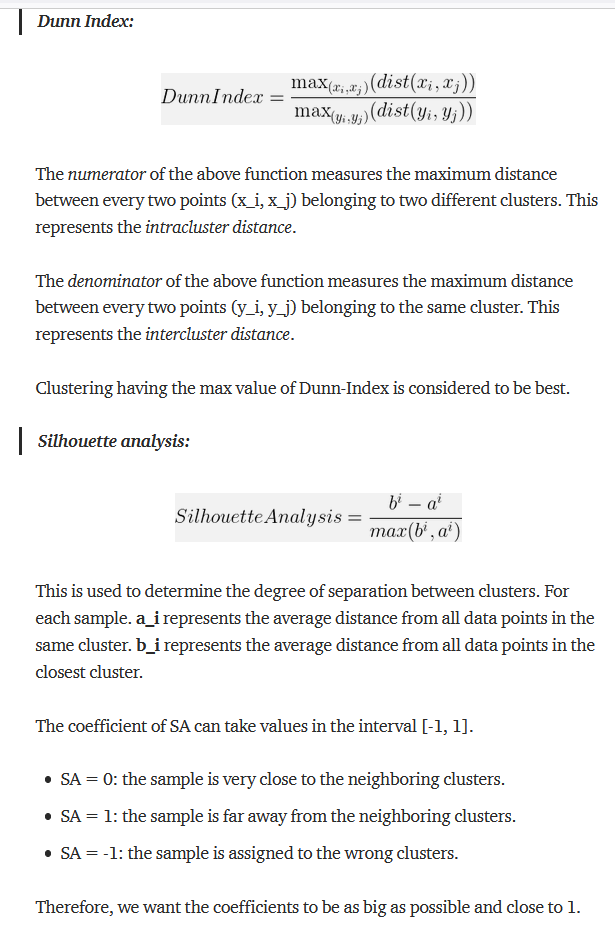

# other things to do


    Clustering using mini-batches instead of the full dataset.
    Choosing more optimal initial clusters using k-means++, which results in faster convergence.
    using pca for better cluster creation

## Is Feature Scaling required for the K means Algorithm?

Yes, K-Means typically needs to have some form of normalization done on the datasets to work properly since it is sensitive to both the mean and variance of the datasets.

For performing feature scaling, generally, StandardScaler is recommended, but depending on the specific use cases, other techniques might be more suitable as well.

For Example, let’s have 2 variables, named age and salary where age is in the range of 20 to 60 and salary is in the range of 100-150K, since scales of these variables are different so when these variables are substituted in the euclidean distance formula, then the variable which is on the large scale suppresses the variable which is on the smaller scale. So, the impact of age will not be captured very clearly. Hence, you have to scale the variables to the same range using Standard Scaler, Min-Max Scaler, etc.

## Why do you prefer Euclidean distance over Manhattan distance in the K means Algorithm?

Euclidean distance is preferred over Manhattan distance since Manhattan distance calculates distance only vertically or horizontally due to which it has dimension restrictions.

On the contrary, Euclidean distance can be used in any space to calculate the distances between the data points. Since in K means algorithm the data points can be present in any dimension, so Euclidean distance is a more suitable option.


## Does centroid initialization affect K means Algorithm?

Yes, the final results of the k means algorithm depend on the centroid initialization as poor initialization can cause the algorithm to get stuck into an inferior local minimum.

## Explain some cases where K means clustering fails to give good results.

The K means clustering algorithm fails to give good results in the below-mentioned cases:

    When the dataset contains outliers
    When the density spread of data points across the data space is different.
    When the data points follow a non-convex shape.
    
##  What are the possible stopping conditions in the K means Algorithm?

The following can be used as possible stopping conditions in K-Means clustering:

    Max number of iterations has been reached: This condition limits the runtime of the clustering algorithm, but in some cases, the quality of the clustering will be poor because of an insufficient number of iterations.
    When RSS(within-cluster sum of squares) falls below a threshold: This criterion ensures that the clustering is of the desired quality after termination. Practically in real-life problems, it’s a good practice to combine it with a bound on the number of iterations to guarantee convergence.
    Convergence: Points stay in the same cluster i.e., the algorithm has converged at the minima.
    Stability: Centroids of new clusters do not change.


https://medium.com/analytics-and-data/how-to-ace-the-k-means-algorithm-interview-questions-afe346f8fc09
